In [1]:
import pandas as pd
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [2]:
# Download latest version
path = kagglehub.dataset_download("jithinanievarghese/cosmetics-and-beauty-products-reviews-top-brands")

print("Path to dataset files:", path)

100%|██████████| 4.55M/4.55M [00:00<00:00, 17.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jithinanievarghese/cosmetics-and-beauty-products-reviews-top-brands/versions/1


Explorer les fichiers téléchargés

In [3]:
# Afficher le chemin
print("Chemin du dataset :", path)

# Lister les fichiers disponibles
os.listdir(path)

Chemin du dataset : /root/.cache/kagglehub/datasets/jithinanievarghese/cosmetics-and-beauty-products-reviews-top-brands/versions/1


['nyka_top_brands_cosmetics_product_reviews.csv']

Chargement du fichier csv sur les retours des utilisateurs

In [4]:
import os

# The 'path' variable is a directory. We need to specify the exact file within it.
file_name = 'nyka_top_brands_cosmetics_product_reviews.csv'
full_file_path = os.path.join(path, file_name)

df = pd.read_csv(full_file_path, encoding='latin1')

In [5]:
df.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

Analyse du Dataset

In [7]:
#Taille du dataset
print("Taille du dataset :", df.shape)

Taille du dataset : (61284, 18)


In [8]:
#Supprimer des colonnes
df.drop(['author', 'is_a_buyer', 'pro_user', 'review_label', 'price', 'mrp', 'product_url', 'product_rating_count', 'product_rating', 'product_tags'], axis=1, inplace=True)
df.head()

,product_id,brand_name,review_id,review_title,review_text,review_date,review_rating,product_title
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,2021-01-23 15:17:18,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,2020-09-07 15:30:42,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,2020-11-13 12:24:14,4.0,Olay Ultra Lightweight Moisturiser: Luminous W...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",2020-06-14 11:56:50,3.0,Olay Ultra Lightweight Moisturiser: Luminous W...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,2020-12-22 15:24:35,2.0,Olay Ultra Lightweight Moisturiser: Luminous W...


##Charger et explorer (EDA) : longueurs de texte, distribution des labels, mots fréquents

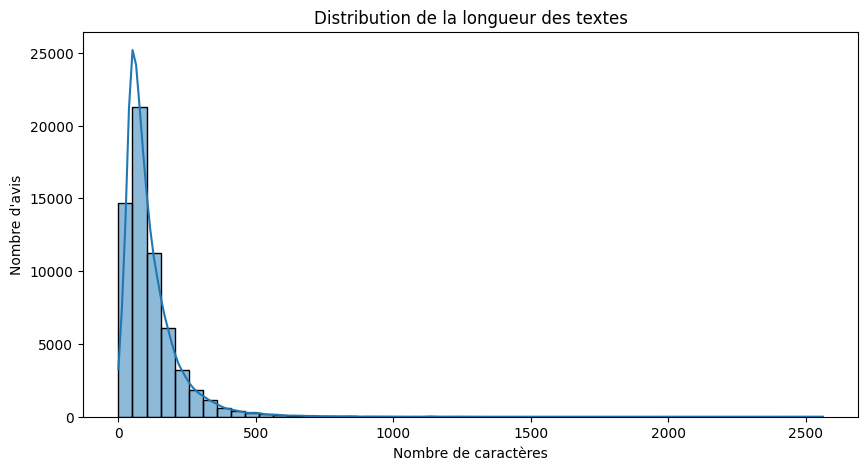

In [9]:
# --- 3a : Longueur des textes ---
# Convertir la colonne 'review_text' en string et remplacer les NaN par des chaînes vides avant de calculer la longueur
df['text_length'] = df['review_text'].astype(str).apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution de la longueur des textes")
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre d'avis")
plt.show()

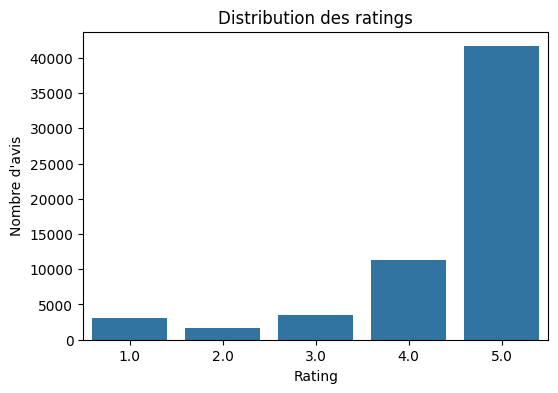

In [10]:
# --- 3b : Distribution des labels ---
plt.figure(figsize=(6,4))
sns.countplot(x='review_rating', data=df)
plt.title("Distribution des ratings")
plt.xlabel("Rating")
plt.ylabel("Nombre d'avis")
plt.show()

20 mots les plus fréquents :
the: 45425
it: 44883
and: 42637
is: 34855
i: 30598
a: 30065
this: 28077
for: 25214
to: 21789
my: 15835
good: 15206
very: 15002
its: 14345
product: 13301
of: 12355
but: 12139
so: 11298
in: 10946
with: 10346
skin: 10249


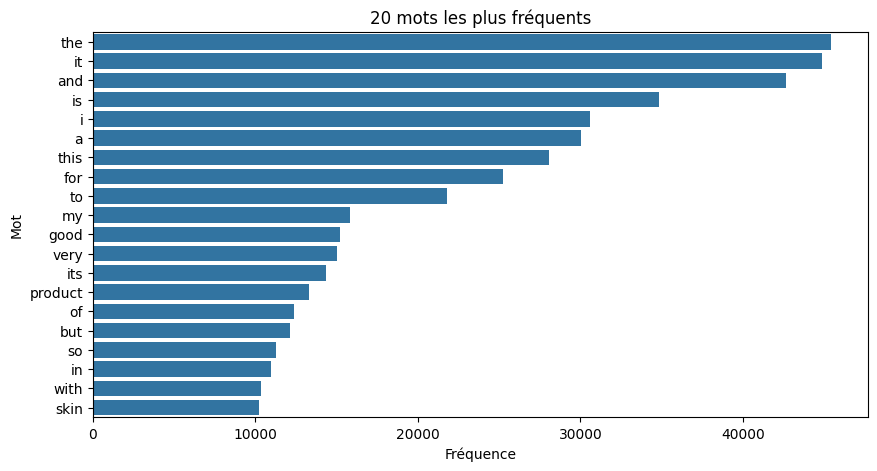

In [11]:
# On nettoie le texte et on compte les mots
def tokenize(review_text):
    review_text = review_text.lower()
    review_text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', review_text)  # retirer ponctuation
    return review_text.split()

# Ensure all text entries are strings and handle NaNs before tokenizing
processed_texts = df['review_text'].fillna('').astype(str)
all_words = [word for text in processed_texts for word in tokenize(text)]
most_common_words = Counter(all_words).most_common(20)

print("20 mots les plus fréquents :")
for word, freq in most_common_words:
    print(f"{word}: {freq}")

# Optionnel : histogramme des mots fréquents
words, counts = zip(*most_common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words))
plt.title("20 mots les plus fréquents")
plt.xlabel("Fréquence")
plt.ylabel("Mot")
plt.show()

##Supprimer les lignes vides ou doublons

In [12]:
# Supprimer avis sans texte
df = df.dropna(subset=["review_text"])

# Supprimer doublons si nécessaire
df = df.drop_duplicates(subset=["review_text"])
df.head()

,product_id,brand_name,review_id,review_title,review_text,review_date,review_rating,product_title,text_length
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,2021-01-23 15:17:18,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...,107
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,2020-09-07 15:30:42,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...,88
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,2020-11-13 12:24:14,4.0,Olay Ultra Lightweight Moisturiser: Luminous W...,177
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",2020-06-14 11:56:50,3.0,Olay Ultra Lightweight Moisturiser: Luminous W...,218
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,2020-12-22 15:24:35,2.0,Olay Ultra Lightweight Moisturiser: Luminous W...,57


Nettoyage du texte

Pour NLP, il faut uniformiser et simplifier le texte :

Mettre en minuscules

Retirer ponctuation, chiffres, symboles

Retirer espaces multiples

Éventuellement retirer stopwords (mots très fréquents comme “le”, “et”, “de”) si besoin pour l’extraction de thématiques

In [13]:
def clean_text(text):
    text = text.lower()  # minuscules
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)  # retirer ponctuation et chiffres
    text = re.sub(r'\s+', ' ', text)  # retirer espaces multiples
    text = text.strip()
    return text

df['clean_text'] = df['review_text'].apply(clean_text)


In [14]:
#Nettoyage pour review_title
def clean_text(text):
    text = str(text).lower()  # minuscules
    text = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', text)  # retirer ponctuation et chiffres
    text = re.sub(r'\s+', ' ', text)  # retirer espaces multiples
    text = text.strip()
    return text

df['clean_review_title'] = df['review_title'].apply(clean_text)


##Création du label de sentiment

In [15]:
def rating_to_sentiment(r):
    if r >= 4:
        return "positif"
    elif r == 3:
        return "neutre"
    else:
        return "negatif"

df['sentiment'] = df['review_rating'].apply(rating_to_sentiment)


Nettoyage final et vérification

In [16]:
# Vérifier les valeurs nulles
print(df.isnull().sum())

# Aperçu des données
print(df.head())


product_id            0
brand_name            0
review_id             0
review_title          0
review_text           0
review_date           0
review_rating         1
product_title         0
text_length           0
clean_text            0
clean_review_title    0
sentiment             0
dtype: int64
   product_id brand_name  review_id                         review_title  \
0      781070       Olay   16752142                 Worth buying 50g one   
1      781070       Olay   14682550           Best cream to start ur day   
2      781070       Olay   15618995  perfect for summers dry for winters   
3      781070       Olay   13474509                    Not a moisturizer   
4      781070       Olay   16338982                              Average   

                                         review_text          review_date  \
0  Works as it claims. Could see the difference f...  2021-01-23 15:17:18   
1  It does what it claims . Best thing is it smoo...  2020-09-07 15:30:42   
2  I have b

#Prétraitement NLP

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))  # ou 'french' si dataset français
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)
df['processed_title'] = df['clean_review_title'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,product_id,brand_name,review_id,review_title,review_text,review_date,review_rating,product_title,text_length,clean_text,clean_review_title,sentiment,processed_text,processed_title
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,2021-01-23 15:17:18,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...,107,works as it claims could see the difference fr...,worth buying g one,positif,work claim could see difference first day use ...,worth buying g one
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,2020-09-07 15:30:42,5.0,Olay Ultra Lightweight Moisturiser: Luminous W...,88,it does what it claims best thing is it smooth...,best cream to start ur day,positif,claim best thing smoothens ur skin n make soft...,best cream start ur day
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,2020-11-13 12:24:14,4.0,Olay Ultra Lightweight Moisturiser: Luminous W...,177,i have been using this product for months now ...,perfect for summers dry for winters,positif,using product month perfect combination n oily...,perfect summer dry winter
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",2020-06-14 11:56:50,3.0,Olay Ultra Lightweight Moisturiser: Luminous W...,218,i have an oily skin while this whip acts as a ...,not a moisturizer,neutre,oily skin whip act great base primer smoothens...,moisturizer
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,2020-12-22 15:24:35,2.0,Olay Ultra Lightweight Moisturiser: Luminous W...,57,its not that good please refresh try for other...,average,negatif,good please refresh try product,average


Vectorisation : transformer les textes en format utilisable par un modèle ML :

TF-IDF pour un modèle classique (Logistic Regression, Random Forest)

Embeddings pour un modèle deep learning (Word2Vec, FastText, BERT, etc.)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  # limite du vocabulaire
X = vectorizer.fit_transform(df['processed_text'])
y = df['sentiment']


In [ ]:
#Séparation train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrainement du modèle de Régression Logistique

In [ ]:
#Entrainement Logistic regression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


              precision    recall  f1-score   support

     negatif       0.76      0.52      0.62       937
      neutre       0.44      0.08      0.13       695
     positif       0.91      0.99      0.95     10335

    accuracy                           0.90     11967
   macro avg       0.70      0.53      0.57     11967
weighted avg       0.87      0.90      0.87     11967



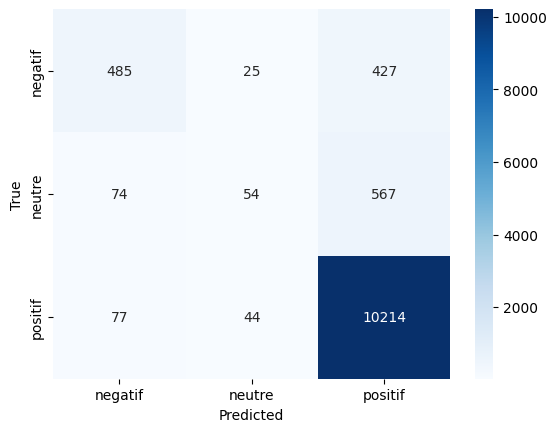

In [ ]:
#Evaluation des métriques
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Entrainement du modèle *SVM*

In [ ]:
model_svm = SVC(
    C=1.0,           # Régularisation (plus C est grand, moins de marge)
    kernel='rbf',    # 'linear', 'rbf', 'poly'
    gamma='scale',   # Pour noyau RBF
    class_weight='balanced',  # Utile si classes déséquilibrées
    probability=True  # Pour predict_proba
)

# Entraînement
model_svm.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

In [ ]:
# Evaluation métriques pour SVM
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()